<a href="https://colab.research.google.com/github/Mgobeaalcoba/Exploration_Data_Analyst/blob/main/20_TSA_con_Open_Power_System_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

*Análisis de Series de Tiempo (TSA)*

In [15]:
# load time series dataset
import pandas as pd 
import numpy as np 
import seaborn as sns

In [16]:
url='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/df_power.csv'

In [17]:
df_power_system= pd.read_csv(url,error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
df_power_system.columns

Index(['Unnamed: 0', 'Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [19]:
df_power_system.shape

(4383, 6)

In [20]:
df_power_system.tail(10)

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
4373,4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [21]:
#convertir  object para  datetime 
df_power_system['Date'] = pd.to_datetime(df_power_system['Date']) # Otra forma de convertir a datetime es con un apply(lambda x: x.to_datetime)

In [22]:
df_power_system = df_power_system.set_index('Date')

In [23]:
df_power_system

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,0,1069.18400,NaN,NaN,NaN
2006-01-02,1,1380.52100,NaN,NaN,NaN
2006-01-03,2,1442.53300,NaN,NaN,NaN
2006-01-04,3,1457.21700,NaN,NaN,NaN
2006-01-05,4,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-27,4378,1263.94091,394.507,16.530,411.037
2017-12-28,4379,1299.86398,506.424,14.162,520.586
2017-12-29,4380,1295.08753,584.277,29.854,614.131


In [30]:
# Add columns with year, month, and weekday name
# Future enginering
df_power_system['Year'] = df_power_system.index.year
df_power_system['Month'] = df_power_system.index.month
df_power_system['Day number'] = df_power_system.index.day
df_power_system['Weekday Name'] = df_power_system.index.day_name()

# Siempre es mejor trabajar las fechas fijandolas previamente como indices. 
# Si quisiera hacer lo mismo con una columna que no es indice se puede de la siguiente forma:
# df_power['Date'].dt.year para el año

In [31]:
df_power_system.head()

,Unnamed: 0,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Day number
Date,,,,,,,,,
2006-01-01,0,1069.184,NaN,NaN,NaN,2006,1,Sunday,1
2006-01-02,1,1380.521,NaN,NaN,NaN,2006,1,Monday,2
2006-01-03,2,1442.533,NaN,NaN,NaN,2006,1,Tuesday,3
2006-01-04,3,1457.217,NaN,NaN,NaN,2006,1,Wednesday,4
2006-01-05,4,1477.131,NaN,NaN,NaN,2006,1,Thursday,5


# VIsuzalización de los datos 

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


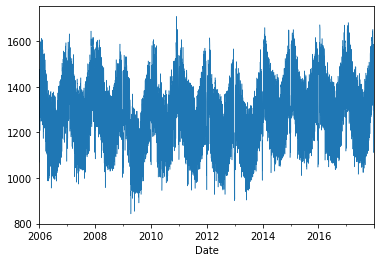

In [34]:
df_power_system['Consumption'].plot(linewidth=0.5) # Grafico el consumo a traves de todo el dataset

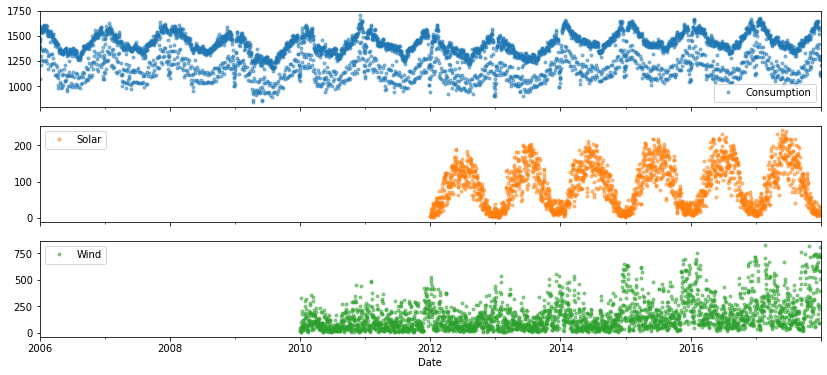

In [37]:
cols_to_plot = ['Consumption', 'Solar', 'Wind'] # Guardo en variable las columans que luego quiero graficar con un plot dividido en subplots por columnas
axes = df_power_system[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)


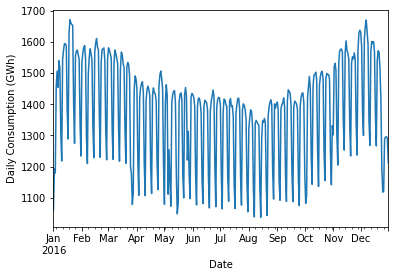

In [39]:
ax = df_power_system.loc['2016', 'Consumption'].plot() # Al fijar la fecha como indice puedo filtrar el rango a mostrar con un .loc y escribieron los valores de fecha que deseo, luego paso las columnas
ax.set_ylabel('Daily Consumption (GWh)');

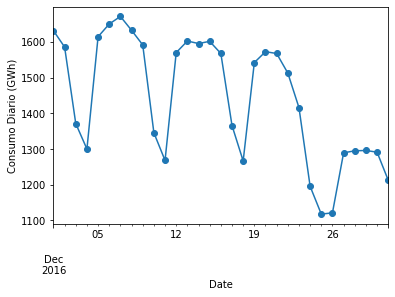

In [41]:
ax = df_power_system.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-') # Puedo hacer el mismo filtro pero con año y mes si lo deseo
ax.set_ylabel('Consumo Diario (GWh)');

Agrupando los datos 

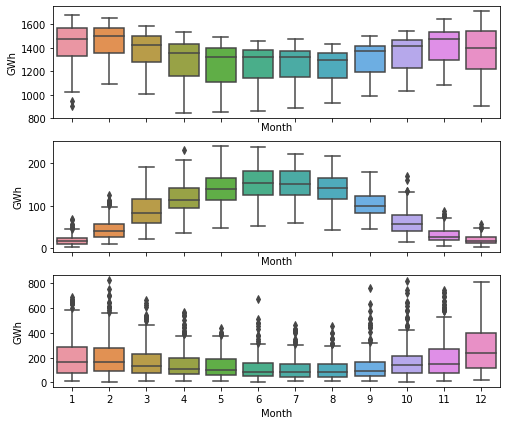

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes): # Con este ciclo recorro las distintas columnas por un lado y por otro los distintos ejes creados en el subplots dejando fijo la variable x 
    # que es el mes
    sns.boxplot(data=df_power_system, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    

In [44]:
power_weak_mean = df_power_system['Consumption'].resample('W').mean() # Agrupo el consumo por semana y calculo su promedio


In [45]:
power_weak_mean

Date
2006-01-01    1069.184000
2006-01-08    1381.300143
2006-01-15    1486.730286
2006-01-22    1490.031143
2006-01-29    1514.176857
                 ...     
2017-12-03    1536.236314
2017-12-10    1554.824946
2017-12-17    1543.856889
2017-12-24    1440.342401
2017-12-31    1203.265211
Freq: W-SUN, Name: Consumption, Length: 627, dtype: float64

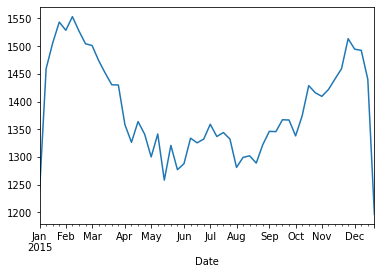

In [55]:
power_weak_mean.loc['2015'].plot()


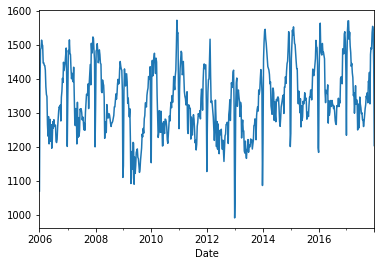

In [56]:
power_weak_mean.plot()